In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from skimage.io import imread, imshow
from skimage.transform import resize
from sklearn.model_selection import train_test_split 
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
DATADIR = "PetImages\\train"

CATEGORIES = ["Cat", "Dog"]
IMG_SIZE=128
training_data=[]
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [01:39<00:00, 125.32it/s]

24437


In [3]:
import random
random.shuffle(training_data)
X=[]
y=[]
for i in training_data[:10]:
    #print(i)
    pass
    
for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [4]:
model = models.Sequential()
#layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))  #Dropout for regularization
#layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#layer3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#layer4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
#final layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
#Lets see our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0

In [6]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
history=model.fit(X_train,y_train,epochs=4,validation_data=(X_test,y_test))
value_loss,value_acc=model.evaluate(X_test,y_test)
print(value_loss," ",value_acc)

Train on 19549 samples, validate on 4888 samples
Epoch 1/4
19549/19549 [==============================] - 3323s 170ms/sample - loss: 1.9149 - acc: 0.5207 - val_loss: 0.6910 - val_acc: 0.5315
Epoch 2/4
19549/19549 [==============================] - 2620s 134ms/sample - loss: 0.6881 - acc: 0.5423 - val_loss: 0.6855 - val_acc: 0.5493
Epoch 3/4
19549/19549 [==============================] - 2648s 135ms/sample - loss: 0.6834 - acc: 0.5550 - val_loss: 0.6876 - val_acc: 0.5426
Epoch 4/4
4888/4888 [==============================] - 207s 42ms/sample - loss: 0.6821 - acc: 0.5736
0.6821185289935473   0.57364976


4888/4888 - 199s - loss: 0.6821 - acc: 0.5736


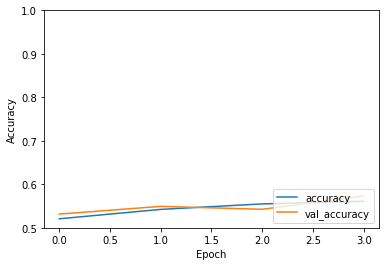

In [8]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [9]:
test_data=[]
def create_testing_data():
    DATADIR = "PetImages\\test"

    #test_imgs = ['PetImages\\test\\{}'.format(i) for i in os.listdir(DATADIR)] #get test images
    X_test=[]
    y_test=[]
    for img in tqdm(os.listdir(DATADIR)):  # iterate over each image per dogs and cats
                try:
                    img_array = cv2.imread(os.path.join(DATADIR,img))  # convert to array
                    X_test = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                    test_data.append([X_test, y_test])  # add this to our training_data
                except Exception as e:  # in the interest in keeping the output clean...
                    pass
                #except OSError as e:
                #    print("OSErrroBad img most likely", e, os.path.join(path,img))
                #except Exception as e:
                #    print("general exception", e, os.path.join(path,img))

100%|██████████████████████████████████████████████████████████████████████████████| 1005/1005 [00:32<00:00, 31.15it/s]


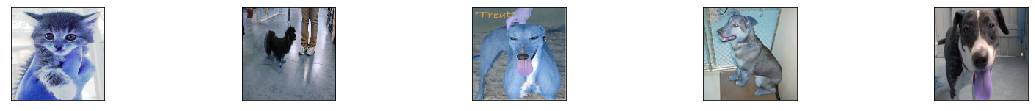

In [10]:
#Now lets predict on the first 10 Images of the test set
create_testing_data()
X=[]
y=[]
for features,label in test_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

IMG_SIZE=128
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i],cmap=plt.cm.binary)

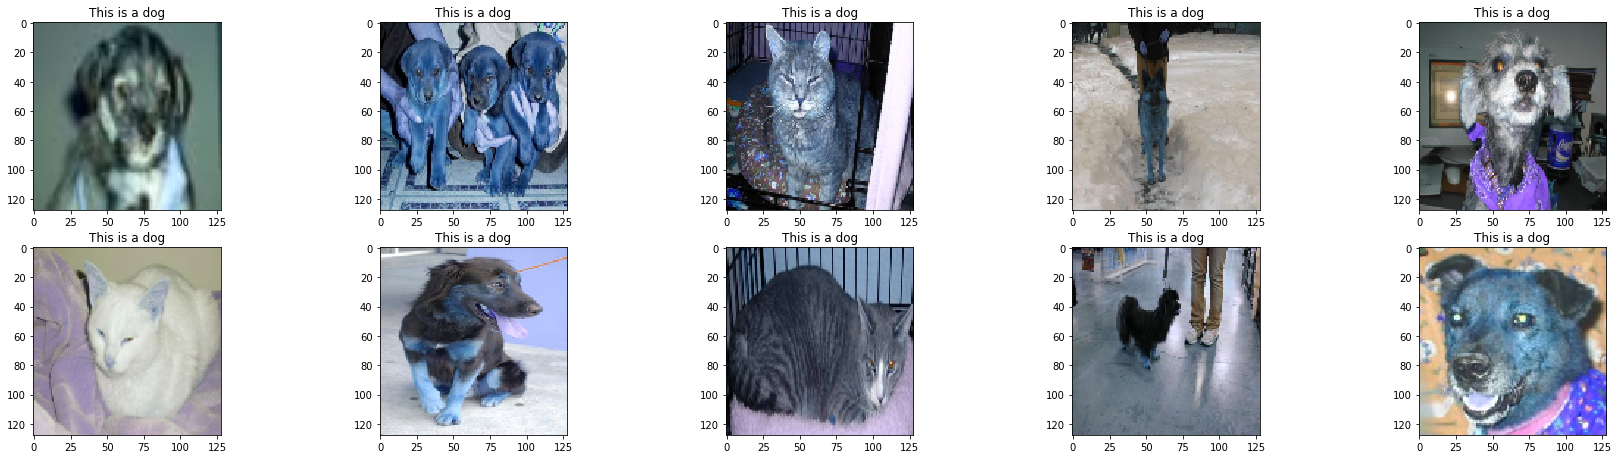

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
i = 0
text_labels = []
batch=32
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(X, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    plt.subplot(5,5,i+1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10== 0:
        break
plt.show()